# **GDS Short Course on Data Science for Physicists I**
# Unsupervised learning tutorial
Trevor David Rhone
- Rensselaer Polytechnic Institute
- https://materials-intelligence.com/

Preliminary activities:
- switch to a gpu runtime type
- install the packages below

In [ ]:
!pip install pymatgen pandas tensorflow keras numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
# import useful python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

#K-means clustering

In [ ]:
# import useful modeules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate dummy data with 3 clusters using make_blobs()
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

Inspecct the contents of X, its shape, print a few values:

In [ ]:
# Enter your code here:

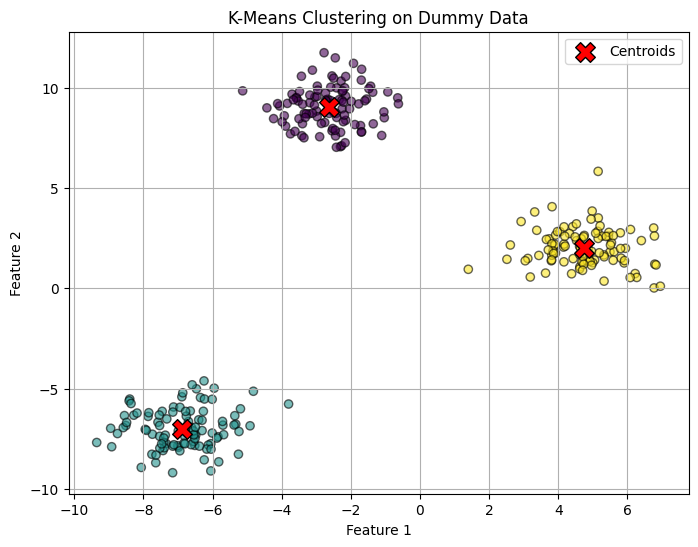

In [ ]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
kmeans.fit(X)
y_pred = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', edgecolors='black', label="Centroids")

plt.title("K-Means Clustering on Dummy Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


### Question:
- Change n_cluster, n_features and re run the code above.  How do we know to set K for an 'unknown' data set?
- How can K-means clustering be applied to learn patterns in 'real world' data?


# Principal components analysis

In [ ]:
# import useful modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate high-dimensional dummy data (10 features) using sklearn.datasets.make_classification()
n_samples = 300
n_features = 10
n_classes = 3
random_state = 42

X, y = make_classification(n_samples=n_samples, n_features=n_features,
                           n_informative=5, n_clusters_per_class=1,
                           n_classes=n_classes, random_state=random_state)

Inspect the contents of X:

In [ ]:
# Write your code here:

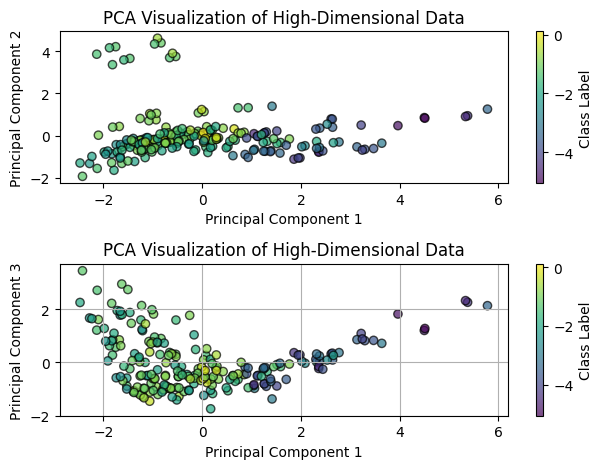

Explained variance by PC1 & PC2: 77.40%


In [ ]:
# Standardize the features (PCA works better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

plt.subplot(2,1,1)
# Plot the PCA-transformed data
# plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of High-Dimensional Data")
plt.colorbar(label="Class Label")

plt.subplot(2,1,2)
# Plot the PCA-transformed data
# plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.title("PCA Visualization of High-Dimensional Data")
plt.colorbar(label="Class Label")
plt.grid(True)

plt.grid(True)
plt.tight_layout()
plt.show()

# Print explained variance ratio
print(f"Explained variance by PC1 & PC2: {pca.explained_variance_ratio_.sum():.2%}")


### Question:
- How can PCA be applied to learn patterns in 'real world' data?

## Access Materials Project
- create an account with the materials project
- input your API_KEY below:
- Are you using the modern or legacy API?
 - https://docs.materialsproject.org/downloading-data/differences-between-new-and-legacy-api

In [ ]:
!pip install mp-api

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.6/212.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.6/122.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 8.2 MB/s eta 0:00:00
   ━━━

In [ ]:
use_legacy_materials_project = False
if use_legacy_materials_project:
  from pymatgen.ext.matproj import MPRester
  # Replace with your Materials Project API key
  API_KEY = "replace with your key"
  mpr = MPRester(API_KEY)
else:
  from mp_api.client import MPRester
  # Replace with your Materials Project API key
  API_KEY = "replace with your key"
  mpr = MPRester(API_KEY)

#Associative learning
- The cell below pulls data from the materials project (https://next-gen.materialsproject.org/)
- You will need an account and an API key to use this free service

### Download data from the materials project

In [ ]:
# import useful modules
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Query oxide materials with band gap data and formation energy per atom data
if use_legacy_materials_project:
  materials_data = mpr.query(
      {"elements": {"$in": ["O","Se","Te"]}, "band_gap": {"$gt": 0}},  # Select materials containing oxygen & nonzero band gap
      ["task_id", "pretty_formula", "elements", "band_gap", "e_above_hull", "formation_energy_per_atom"]
  )
else:
  with MPRester(API_KEY) as mpr:
    materials_data = mpr.materials.summary.search(
        elements=["Si", "O"], band_gap=(0.0, None),
        fields=["material_id", "formula_pretty", "elements", "band_gap", "energy_above_hull", "formation_energy_per_atom"]
    )
# you can pickle the result and save to your google drive to reload data with ease.


Retrieving SummaryDoc documents:   0%|          | 0/7633 [00:00<?, ?it/s]

### Data wrangling

In [ ]:
# Flatten nested data within each document
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)


if use_legacy_materials_project:
  # Convert to DataFrame
  df = pd.DataFrame(materials_data)
else:
  # Flatten each document before creating the DataFrame
  flattened_docs = [flatten_dict(doc.dict()) for doc in materials_data]
  df = pd.DataFrame(flattened_docs)
  df_clean = df.dropna(axis=1)
  df_clean = df_clean.drop(columns="fields_not_requested")
  df = df_clean.copy()


In [ ]:
# inspect database
df.head()

,elements,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap
0,"[O, Si]",SiO2,mp-1244945,-3.151941,0.120891,5.0170
1,"[O, Si]",SiO2,mp-1244965,-3.089459,0.183373,1.5998
2,"[O, Si]",SiO2,mp-1244968,-3.020734,0.252098,2.9151
3,"[O, Si]",SiO2,mp-1245026,-3.108552,0.164279,1.9065
4,"[O, Si]",SiO4,mp-1391176,-0.520408,1.443291,0.1484


In [ ]:
# Define band gap categories
def categorize_band_gap(bg):
    if bg < 1:
        return "Low Band Gap"
    elif 1 <= bg < 3:
        return "Medium Band Gap"
    else:
        return "High Band Gap"

# Define formation energy categories
def categorize_formation_energy(ef):
    if ef > -1.0:
        return "Low stability"
    elif -3.0 < ef <= -1.0:
        return "Medium stability"
    else:
        return "High stability"
# Apply categorization

use_formation_energy = True
if use_formation_energy:
  df["Formation Energy Category"] = df["formation_energy_per_atom"].apply(categorize_formation_energy)
else:
  # use the band gap info
  df["Band Gap Category"] = df["band_gap"].apply(categorize_band_gap)

# One-hot encode elements
unique_elements = set(el for elems in df["elements"] for el in elems)
for element in unique_elements:
    df[element] = df["elements"].apply(lambda x: 1 if element in x else 0)

# One-hot encode band gap categories
if use_formation_energy:
  df = pd.get_dummies(df, columns=["Formation Energy Category"])
else:
  df = pd.get_dummies(df, columns=["Band Gap Category"])

df_mp = df.copy()

### inspect data downloaded from the materials project


In [ ]:
# inspect data downloaded from the materials project
print("Number of data entries from the materials project: ", df_mp.shape[0])
print("Number of data attributes: ", df_mp.shape[1])
df_mp.head()

Number of data entries from the materials project:  7633
Number of data attributes:  90


,elements,formula_pretty,material_id,formation_energy_per_atom,energy_above_hull,band_gap,Dy,P,Cu,Ag,...,Gd,Nd,Rh,Ge,Sn,U,I,Formation Energy Category_High stability,Formation Energy Category_Low stability,Formation Energy Category_Medium stability
0,"[O, Si]",SiO2,mp-1244945,-3.151941,0.120891,5.0170,0,0,0,0,...,0,0,0,0,0,0,0,True,False,False
1,"[O, Si]",SiO2,mp-1244965,-3.089459,0.183373,1.5998,0,0,0,0,...,0,0,0,0,0,0,0,True,False,False
2,"[O, Si]",SiO2,mp-1244968,-3.020734,0.252098,2.9151,0,0,0,0,...,0,0,0,0,0,0,0,True,False,False
3,"[O, Si]",SiO2,mp-1245026,-3.108552,0.164279,1.9065,0,0,0,0,...,0,0,0,0,0,0,0,True,False,False
4,"[O, Si]",SiO4,mp-1391176,-0.520408,1.443291,0.1484,0,0,0,0,...,0,0,0,0,0,0,0,False,True,False


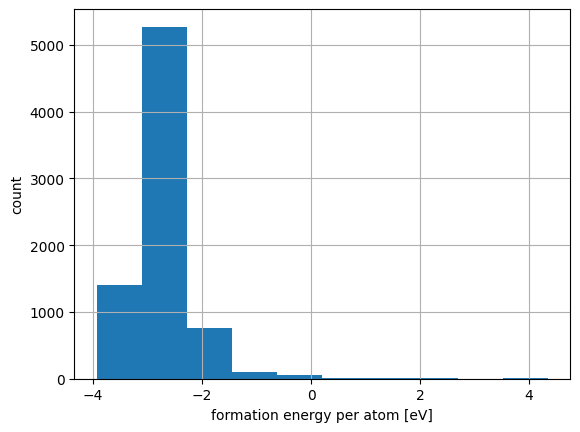

In [ ]:
# Visualize the formation energy data
df_mp.formation_energy_per_atom.hist()
plt.xlabel("formation energy per atom [eV]")
plt.ylabel("count")
plt.show()

Calculate the association rules using the apriori alogrithm:

In [ ]:
# Drop unnecessary columns
if use_legacy_materials_project:
  df = df.drop(columns=["elements", "task_id", "pretty_formula", "band_gap", "e_above_hull", "formation_energy_per_atom"])
else:
  df = df.drop(columns=["elements", "material_id", "formula_pretty", "band_gap", "energy_above_hull", "formation_energy_per_atom"])

# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [ ]:
select_rules_columns = ['antecedents', 'consequents',  'support', 'confidence', 'lift']
rules.loc[:5,select_rules_columns]

,antecedents,consequents,support,confidence,lift
0,(Na),(P),0.102188,0.235436,2.116707
1,(P),(Na),0.102188,0.918728,2.116707
2,(O),(P),0.111228,0.111228,1.000000
3,(P),(O),0.111228,1.000000,1.000000
4,(Si),(P),0.111228,0.111228,1.000000
5,(P),(Si),0.111228,1.000000,1.000000


In [ ]:
# Display results for a set of criteria defined by the support and confidence
support_criterion = rules.support > 0.11
confidence_criterion = rules.confidence > 0.50
rules[support_criterion & confidence_criterion][select_rules_columns]

,antecedents,consequents,support,confidence,lift
3,(P),(O),0.111228,1.000000,1.000000
5,(P),(Si),0.111228,1.000000,1.000000
7,(Mg),(O),0.134023,1.000000,1.000000
9,(Mg),(Si),0.134023,1.000000,1.000000
17,(Na),(O),0.434036,1.000000,1.000000
...,...,...,...,...,...
800,"(O, S)","(Na, Si, Formation Energy Category_Medium stab...",0.211450,0.871490,2.494220
801,"(Na, S)","(O, Si, Formation Energy Category_Medium stabi...",0.211450,0.965311,1.349985
802,"(Si, S)","(O, Na, Formation Energy Category_Medium stabi...",0.211450,0.871490,2.494220
804,"(Na, Formation Energy Category_Medium stability)","(O, Si, S)",0.211450,0.605174,2.494220


### Question:
- Can these results be easily interpreted?
- What's a plausible interpretation?
- What would you change to improve interpretability? [Hint: Consider the data distribution and the choice of descriptors]

# Generative modeling
- Leverage variational autoencoders (VAEs) from materials discovery

Install Required Libraries to implement the VAE

In [ ]:
pip install pymatgen pandas tensorflow keras numpy scikit-learn

 Fetch materials data from the Materials Project

In [ ]:
# import useful modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:

# Query oxide materials with band gap data and formation energy per atom data
if use_legacy_materials_project:
  materials_data_gm = mpr.query(
      criteria={"elements": {"$in": ["O", "Fe", "Ti", "Ni", "Zn"]}},  # Example elements
      properties=["pretty_formula", "elements", "formation_energy_per_atom", "band_gap"]
  )
else:
  print("use_legacy_materials_project:", use_legacy_materials_project)
  elements_list = ["O"]   # Elements to search for
  all_materials = []
  with MPRester(API_KEY) as mpr:
      for element in elements_list:
          materials = mpr.summary.search(
              elements=[element],  # Get materials that contain at least this element
              fields=["formula_pretty", "elements", "formation_energy_per_atom", "band_gap"]
          )
          all_materials.extend(materials)  # Add to list

materials_data_gm = all_materials
# you can pickle the result and save to your google drive to reload data with ease.
print(len(materials_data_gm))

use_legacy_materials_project: False


<ipython-input-22-f3d20162f228>:13: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  materials = mpr.summary.search(


Retrieving SummaryDoc documents:   0%|          | 0/82229 [00:00<?, ?it/s]

82229


In [ ]:
# Convert to DataFrame

fields_not_requested = ['builder_meta', 'nsites', 'nelements', 'composition', 'composition_reduced', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic', 'n', 'e_ij_max', 'weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy', 'weighted_work_function', 'surface_anisotropy', 'shape_factor', 'has_reconstructed', 'possible_species', 'has_props', 'theoretical', 'database_IDs']
if use_legacy_materials_project:
  df = pd.DataFrame(materials_data_gm)
else:
  # Flatten each document before creating the DataFrame
  flattened_docs_gm = [flatten_dict(doc.dict()) for doc in materials_data_gm]
  df = pd.DataFrame(flattened_docs_gm)
  df = df.drop(columns=fields_not_requested)
  df_clean = df.dropna(axis=0)
  df_clean = df_clean.drop(columns="fields_not_requested")
  df = df_clean.copy()


In [ ]:
# Inspect data
df.head()

,elements,formula_pretty,formation_energy_per_atom,band_gap
0,"[Ba, O]",BaO,-2.619276,1.7049
1,"[Co, O]",CoO,-0.870093,0.2197
2,"[Ca, O]",CaO,-2.994918,2.1384
3,"[Be, O]",BeO,-2.845417,4.4843
4,"[Be, O]",BeO,-2.838604,4.4524


####  Data wrangling

In [ ]:
# Get a list of unique elements
unique_elements = sorted(set(el for elems in df["elements"] for el in elems))

# One-hot encode elemental composition
for element in unique_elements:
    df[element] = df["elements"].apply(lambda x: 1 if element in x else 0)

# Normalize formation energy
scaler = StandardScaler()
df["formation_energy_per_atom"] = scaler.fit_transform(df[["formation_energy_per_atom"]])

# Drop unused columns
if use_legacy_materials_project:
  df = df.drop(columns=["elements", "pretty_formula"])
else:
  df = df.drop(columns=["elements", "formula_pretty"])

df_X = df.copy()
df_X = df_X.drop(columns=["formation_energy_per_atom","band_gap"])

# Convert to NumPy array for training
X = df_X.to_numpy()

# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

What do the data look like?

In [ ]:
df_X.head()

,Ac,Ag,Al,As,Au,B,Ba,Be,Bi,Br,...,Tl,Tm,U,V,W,Xe,Y,Yb,Zn,Zr
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Build the Variational Autoencoder (VAE)
 A VAE consists of:

- Encoder: Maps input materials to a latent space.
- Latent Space: Compressed, (hopefully) meaningful representation of materials.
- Decoder: Generates new material compositions from the latent space

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define dimensions
input_dim = X.shape[1]
latent_dim = 5  # Size of the compressed representation

# Encoder
inputs = keras.Input(shape=(input_dim,))
h = layers.Dense(32, activation="relu")(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Encoder
encoder = keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(32, activation="relu")(latent_inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(X_scaled.shape[1], activation="linear")(x)

decoder = keras.Model(latent_inputs, outputs, name="decoder")
decoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 87)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 32)             │          2,816 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 5)              │            165 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 5)              │            165 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 5)              │              0 │ dense_1[0][0],         │
│                           │                        │                │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,146 (12.29 KB)

 Trainable params: 3,146 (12.29 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 87)                  │           5,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,959 (31.09 KB)

 Trainable params: 7,959 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

How can you vary your architecture to improve your results? Consider the following:
- The input to the model
- The size of the latent space
- The number of hidden layers
- The activation functions
- Other hyperparameters

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

# Initialize VAE
vae = VAE(encoder, decoder)

# Define loss function
mse_loss_fn = keras.losses.MeanSquaredError()

def vae_loss(y_true, y_pred):
    z_mean, z_log_var, _ = encoder(y_true)
    mse = mse_loss_fn(y_true, y_pred)
    kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    return mse + kl_loss

# Compile the model
vae.compile(optimizer=keras.optimizers.Adam(), loss=vae_loss)

# Train the VAE
vae.fit(X_scaled, X_scaled, epochs=5, batch_size=32)


Epoch 1/5
2570/2570 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 14.9424
Epoch 2/5
2570/2570 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 1.0376
Epoch 3/5
2570/2570 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.0114
Epoch 4/5
2570/2570 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.0292
Epoch 5/5
2570/2570 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.0192


Generate New Materials
- Once the VAE is trained, we can sample new materials from the latent space.
- Are the results easily interpretable? How can we modify the process or the ML input to overcome challenges linked to interpretability?

In [ ]:
import numpy as np

# Sample from latent space
num_new_samples = 10
z_new = np.random.normal(size=(num_new_samples, latent_dim))

# Decode to material representations
generated_materials = decoder.predict(z_new)

# Convert back to original scale
generated_materials = scaler.inverse_transform(generated_materials)

# Display generated features
pd.DataFrame(generated_materials, columns=df_X.columns).head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


,Ac,Ag,Al,As,Au,B,Ba,Be,Bi,Br,...,Tl,Tm,U,V,W,Xe,Y,Yb,Zn,Zr
0,0.000311,0.016741,0.039998,0.018297,0.002540,0.038431,0.070468,0.004338,0.037280,0.010358,...,0.012809,0.005192,0.014647,0.094213,0.042801,0.000755,0.031250,0.001623,0.040156,0.020971
1,0.000147,0.015335,0.046896,0.020482,0.001409,0.035577,0.071515,0.004396,0.036971,0.009714,...,0.014266,0.006386,0.015084,0.086557,0.042268,0.000154,0.028366,0.002309,0.039941,0.025551
2,0.000210,0.015508,0.040780,0.018094,0.002430,0.036164,0.069451,0.004226,0.036609,0.009847,...,0.013002,0.005317,0.013963,0.090243,0.043527,0.000598,0.030381,0.001516,0.040679,0.021240
3,0.000199,0.015779,0.044714,0.019791,0.001767,0.036480,0.071184,0.004378,0.037069,0.009918,...,0.013806,0.006009,0.014946,0.088978,0.042437,0.000344,0.029278,0.002092,0.040009,0.024102
4,0.000481,0.013866,0.041115,0.014940,0.001840,0.042969,0.068059,0.002452,0.035032,0.011986,...,0.015294,0.006594,0.016413,0.082278,0.043766,0.000007,0.033343,0.001219,0.043769,0.023835


Interpretation of Generated Materials
- Each row represents a synthetic material composition.
- The values for each element indicate its presence in the new material.
- Formation energy per atom provides an estimate of material stability.

## Question:
- How do we select for interesting materials? How do we define interesting?
- What are some challenges with this representation that need to be overcome to be able to implement a framework for materials design?

## Visualizing the Latent Space of the VAE

- Visualizing the latent space helps us understand how the VAE encodes materials and how different materials are related.

- We reduce the latent space to 2D using PCA.
- Plot materials in the latent space to see clusters of similar compositions.
- Color-code materials by their formation energy to observe trends.


Use t-SNE to Visualize Latent Representations

---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

run_full_space = False  #takes a long time to calculate all the rows

if run_full_space:
  # Encode materials into latent space
  z_mean, _, _ = encoder.predict(X_scaled)

  # Apply t-SNE to reduce dimensionality to 2D
  tsne = TSNE(n_components=2, perplexity=30, random_state=42)
  z_2d = tsne.fit_transform(z_mean)
else:
  # Encode materials into latent space
  z_mean, _, _ = encoder.predict(X_scaled)
  # Apply t-SNE to reduce dimensionality to 2D
  tsne = TSNE(n_components=2, perplexity=30, random_state=42)
  subset_data = 100
  z_2d = tsne.fit_transform(z_mean[:subset_data,:])


2570/2570 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


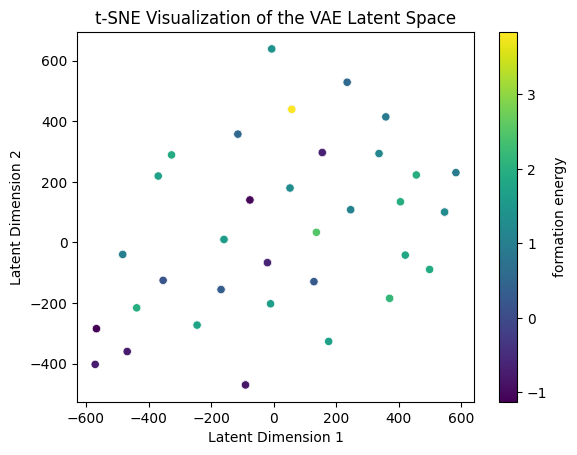

In [ ]:
# Convert to DataFrame
df_latent = pd.DataFrame(z_2d, columns=["Latent_X", "Latent_Y"])
df_latent["formation_energy_per_atom"] = df["formation_energy_per_atom"]  # Add formation energy info for coloring

# Plot
fig, ax = plt.subplots()


# plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x="Latent_X", y="Latent_Y", hue="formation_energy_per_atom", palette="viridis", data=df_latent, legend=False)

c = df_latent["formation_energy_per_atom"]
norm = plt.Normalize(vmin=min(c), vmax=max(c))
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Only needed for colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("formation energy")

#plt.colorbar(label="Band Gap (eV)")
plt.title("t-SNE Visualization of the VAE Latent Space")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

In [ ]:
visualize_formation_energy_data = False
if visualize_formation_energy_data:
  df_latent.formation_energy_per_atom.hist()
  plt.xlabel("formation energy per atom [eV]")
  plt.ylabel("count")
  plt.show()

Use PCA to Visualize the Latent Space

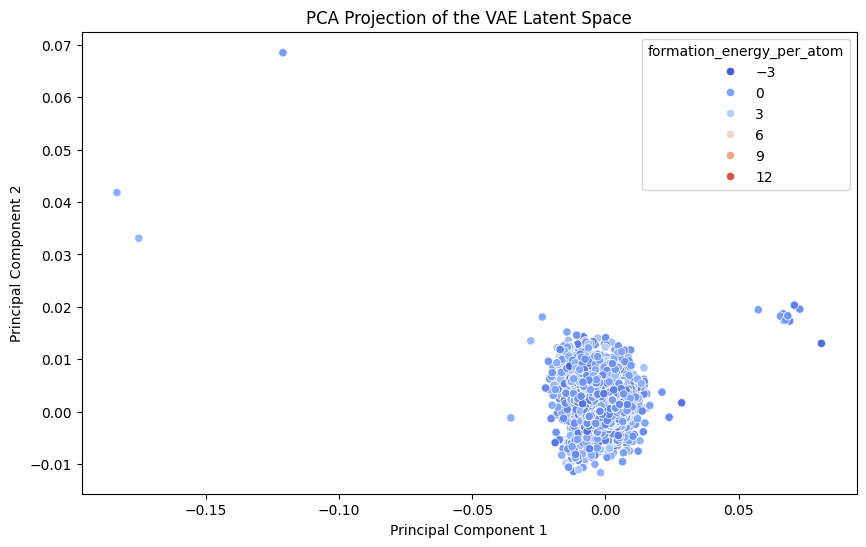

In [ ]:
from sklearn.decomposition import PCA

# Reduce latent space to 2D using PCA
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z_mean)

# Convert to DataFrame
df_pca = pd.DataFrame(z_pca, columns=["PC1", "PC2"])
df_pca["formation_energy_per_atom"] = df["formation_energy_per_atom"]

# Plot PCA latent space
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="formation_energy_per_atom", palette="coolwarm", data=df_pca)
#plt.colorbar(label="formation_energy_per_atom (eV)")
plt.title("PCA Projection of the VAE Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Interpretation of the Visualization
- Clusters: Similar materials should cluster together.
- Formation Energy Trends: If formation energy correlates with latent space structure, we might find regions of stable/unstable materials.
- Outliers: These could be unusual materials with unique properties.

--------------------------------------------------------------------------------
# Research Challenge: vdW magnet informatics

### Download 2D magnetic materials formation energies data set:

Download data from :
https://archive.materialscloud.org/record/2019.0020/v1

Description of data and corresponding study can be found here:
https://www.nature.com/articles/s41598-020-72811-z

- save the file to your google drive (with colab) or your local drive (jupyter notebook).
- Can also upload from github: https://github.com/quantum-intelligence/materials-informatics-tutorial

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls drive/MyDrive/GDS_Tutorial_2025

 CGT_materials_data.csv
'Copy of GDS_tutorial_2025_unsupervised_learning_key.ipynb'
 GDS_tutorial_2025_unsupervised_learning_key.ipynb


Open and load "magneticmoment_Ef_data.csv" using pandas.

In [ ]:
# Create dataframe of "CGT_materials_data.csv" using pandas.
# Change the path to CGT_materials_data.csv as needed.
data_path = "drive/MyDrive/GDS_Tutorial_2025/CGT_materials_data.csv"
df = pd.read_csv(data_path)

Explore the pandas object by examinging the columns:
- df.column()

A summary of the dataframe:
- df.head()


In [ ]:
df.head(n=3)

,Unnamed: 0,formation_energy,elem_frac,elem_list,energy,formula,magnetic_moment,spin_index,num_p,num_d,...,Born,hardness_mean,hardness_var,Nup_mean,Nup_var,cs_bob,cs_PE,cs_IR,cs_AR,cs_OX
0,0,-1.152920,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element T...",-46.782036,Cr1Co1Ge1Te6P1,2.816,1,4,9,...,824.839369,3.676485,0.392730,3.20,2.1600,42880.10573,966.64,13.905000,11.50,4917162.56
1,1,-1.325311,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element Te]",-46.171992,Cr1Co1Ge2Te6,3.142,1,4,9,...,824.567397,3.378096,0.045734,3.25,2.6875,44357.76082,984.88,12.438333,11.35,5087200.04
2,2,-1.458288,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Si, Element G...",-47.107590,Cr1Co1Si1Ge1Te6,3.149,1,4,9,...,824.559724,3.378693,0.036589,3.00,2.4000,42715.38977,991.35,13.955000,11.00,4806565.92


###Task 0
- What are all the possible targets (materials properties) in the dataset?
- What are the 'easy to use' materials descriptors in the dataset?

Consider the following target property, y and descriptors, X.

y --> 'formation_energy'

X --> 'std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif'

- Create X and y data
- Perform data visualization

### Data visualization

###Task #1:
- Identify patterns in the data by using data visualization (PCA, tSNE, K-means clustering).
- What is an appropriate goal for this study? What property can be partitioned into classes? The formation energy? The magneic moment? Or the magnetic order?
- What are appropriate materials descriptors if your goal is to investigate the above target property? [HINT: see descriptors used in the sci reports paper or use your physical intuition'
- Visualize the results using PCA, tSNE and K-means clustering


tSNE visualization:

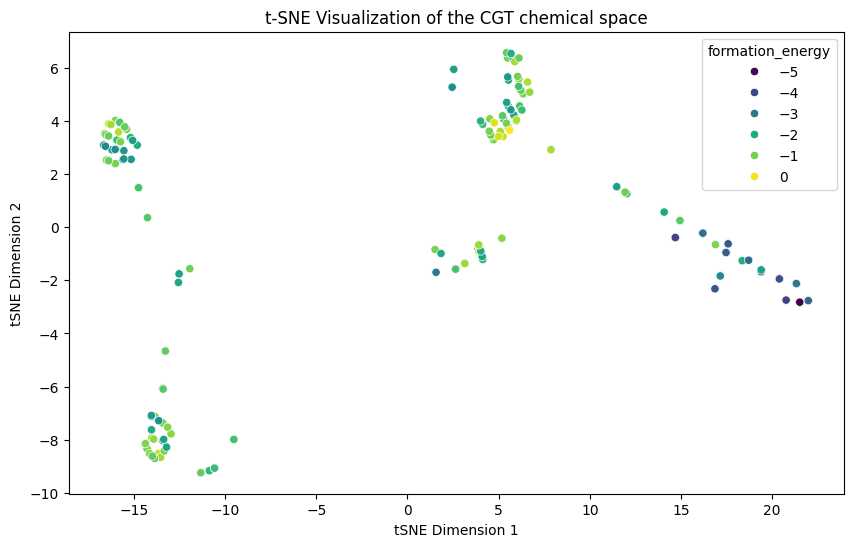

In [ ]:
# Visualize your data before attempting model fitting:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif']]
y = df['formation_energy']

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X)

# Convert to DataFrame
df_tsne = pd.DataFrame(X_2d, columns=["X_1", "X_2"])
df_tsne["formation_energy"] = df["formation_energy"]  # Add band gap info for coloring

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="X_1", y="X_2", hue="formation_energy", palette="viridis", data=df_tsne)
# plt.colorbar(label="formation_energy (eV)")
plt.title("t-SNE Visualization of the CGT chemical space")
plt.xlabel("tSNE Dimension 1")
plt.ylabel("tSNE Dimension 2")
plt.show()

PCA visualization:

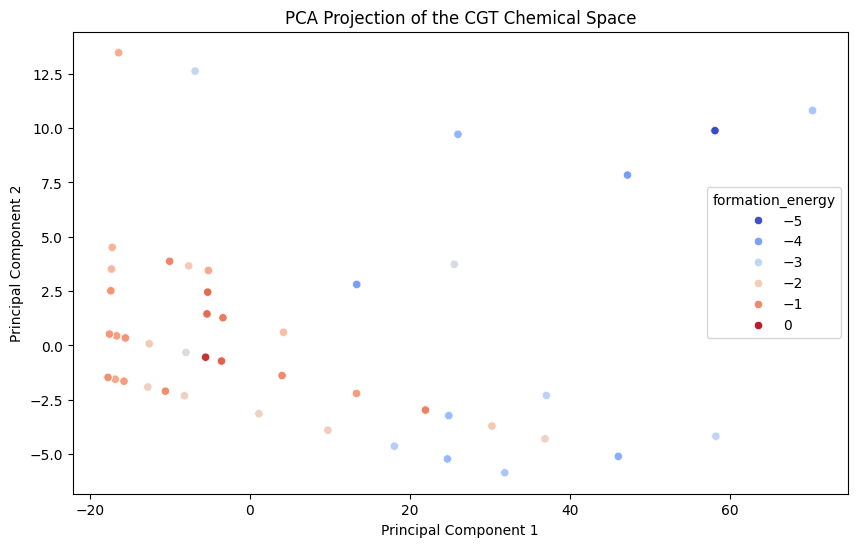

In [ ]:
from sklearn.decomposition import PCA

# Reduce latent space to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["formation_energy"] = df["formation_energy"]

# Plot PCA latent space
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="formation_energy", palette="coolwarm", data=df_pca)
# plt.colorbar(label="formation energy (eV)")
plt.title("PCA Projection of the CGT Chemical Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


### PCA with new target property
- choose descriptors to suit target
- create a visualization and color markers with target property

In [ ]:
# insert your code here

###tSNE with new target proerty
- choose descriptors to suit target
- create a visualization and color markers with target property

In [ ]:
# insert your code here

### Clustering the CGT dataset

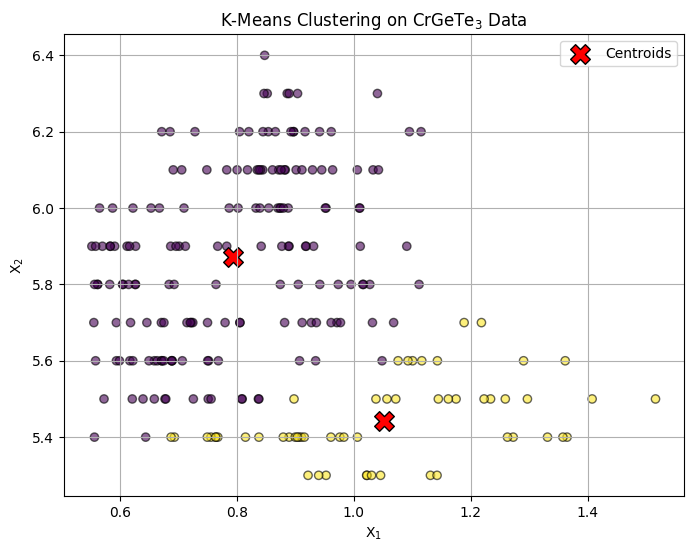

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_clusters = 2 # Is the an appropriate number of clusters for your research goals?
random_state = 42

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
kmeans.fit(X)
y_pred = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
# Make arbitratry 2d projection on X for visualization
# Consider implementing a better approach to X.iloc[:,0] and X.iloc[:,1]
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, cmap='viridis', edgecolors='k', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', edgecolors='black', label="Centroids")

plt.title("K-Means Clustering on CrGeTe$_3$ Data")
plt.xlabel("X$_1$")
plt.ylabel("X$_2$")
plt.legend()
plt.grid(True)
plt.show()


### Question
- Do the clusters correspond to some physically releveant quantity?
- How can we check our hypothesis?

If time permits (and later at home) explore the following for this Cr$_2$Ge$_2$Te$_6$ dataset:
- Associative rule learning
- Generative modeling